<a href="https://colab.research.google.com/github/amrutask/Hate_Speech_Detection/blob/master/code/classification_with_lstm_glove50d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving cleaned_tweets.csv to cleaned_tweets.csv
User uploaded file "cleaned_tweets.csv" with length 4298346 bytes


In [4]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving glove.twitter.27B.50d.txt to glove.twitter.27B.50d.txt
User uploaded file "glove.twitter.27B.50d.txt" with length 510889212 bytes


In [0]:
from keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.optimizers import RMSprop

from keras.layers import Input, Embedding, Activation, Flatten, Dense
from keras.layers import Conv1D, MaxPooling1D, Dropout
from keras.models import Model
from sklearn.model_selection import KFold
from keras.layers import Dense, LSTM, Dropout, Bidirectional, Embedding, GRU
from keras.callbacks import ModelCheckpoint, EarlyStopping

  

In [25]:
data=pd.read_csv("cleaned_tweets.csv")
tweets = data.iloc[:,7].values
labels= data.iloc[:,5].values
print(tweets[0:5])
labels[0:5]
tk = Tokenizer(num_words=None, char_level=False)
tk.fit_on_texts(tweets)

['rt as a woman you shouldn t complain about cleaning up your house amp as a man you should always take the trash out'
 'rt boy dats cold tyga dwn bad for cuffin dat hoe in the 1st place'
 'rt dawg rt you ever fuck a bitch and she start to cry you be confused as shit'
 'rt g anderson based she look like a tranny'
 'rt the shit you hear about me might be true or it might be faker than the bitch who told it to ya 57361']


In [0]:
"""unique_words ={}
i=1
for tweet in tweets:
  words = tweet.strip().split(" ")
  for w in words:
    if w not in unique_words.keys():
      unique_words[w]=i
      i+=1"""

In [63]:
#tk.word_index = unique_words.copy()
#print(tk.word_index)

tweet_data = tk.texts_to_sequences(tweets)

print("Size of the data:", len(tweet_data))

Size of the data: 24783


In [27]:
tweet_data[0]
tweet_data = pad_sequences(tweet_data, maxlen=200, padding='post')
tweet_data[0]

array([   4,   80,    2,  396,    6, 1155,   10, 1113,   67, 3571,   34,
         33,  316,   65,   80,    2,   91,    6,  205,  169,  162,    5,
         55,   62,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [0]:
tweet_data = np.array(tweet_data, dtype='float32')

In [29]:
tweet_data.shape

(24783, 200)

In [0]:
from keras.utils import to_categorical

labels = to_categorical(labels)

In [31]:
vocab_size=len(tk.word_index)
print("Vocabulary size:", vocab_size)

Vocabulary size: 22653


In [32]:
embedding_size = 50
embeddings_index = {}
word_index = tk.word_index

f = open('glove.twitter.27B.50d.txt', 'r')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_matrix = np.zeros((len(word_index) + 1, embedding_size))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

Found 1193515 word vectors.


In [56]:
input_size = 200
vocab_size = len(tk.word_index)


optimizer = 'rmsprop'
loss = 'categorical_crossentropy'

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(tweet_data, labels, test_size=0.2, random_state=0)
  
model = Sequential()
model.add(Embedding(vocab_size+1,
                    embedding_size,
                    trainable=True,
                    input_length=input_size,
                   weights=[embedding_matrix]))

model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])  
history=model.fit(X_train, Y_train,
       validation_data=(X_test, Y_test),
       batch_size=128,   
       epochs=10)

Train on 19826 samples, validate on 4957 samples
Epoch 1/10
19826/19826 [==============================] - 106s 5ms/step - loss: 0.4541 - acc: 0.8498 - val_loss: 0.3602 - val_acc: 0.8822
Epoch 2/10
19826/19826 [==============================] - 102s 5ms/step - loss: 0.3234 - acc: 0.8922 - val_loss: 0.3162 - val_acc: 0.8901
Epoch 3/10
19826/19826 [==============================] - 102s 5ms/step - loss: 0.2795 - acc: 0.9043 - val_loss: 0.2710 - val_acc: 0.9034
Epoch 4/10
19826/19826 [==============================] - 103s 5ms/step - loss: 0.2564 - acc: 0.9104 - val_loss: 0.2741 - val_acc: 0.9054
Epoch 5/10
19826/19826 [==============================] - 102s 5ms/step - loss: 0.2396 - acc: 0.9152 - val_loss: 0.2551 - val_acc: 0.9048
Epoch 6/10
19826/19826 [==============================] - 101s 5ms/step - loss: 0.2253 - acc: 0.9199 - val_loss: 0.2605 - val_acc: 0.9084
Epoch 7/10
19826/19826 [==============================] - 103s 5ms/step - loss: 0.2126 - acc: 0.9258 - val_loss: 0.2628 - v

In [57]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print("Test Accuracy: ", score[1])

Test Accuracy:  0.9096227558553279


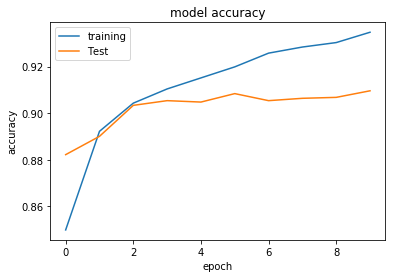

In [58]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'Test'], loc='best')
plt.show()

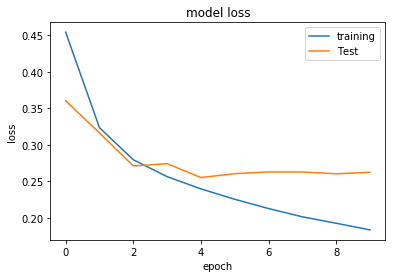

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'Test'], loc='best')
plt.show()

In [0]:
pred= model.predict(X_test)
  
pred_arr = np.zeros(pred.shape[0])
actual_arr = np.zeros(Y_test.shape[0])

for i in range(pred.shape[0]):
  pred_arr[i]=np.argmax(pred[i])
  actual_arr[i]=np.argmax(Y_test[i])

In [61]:
from sklearn.metrics import confusion_matrix

confusion_matrix(actual_arr, pred_arr)

array([[  75,  175,   29],
       [  66, 3692,   94],
       [  11,   73,  742]])

In [62]:
from sklearn.metrics import classification_report
report = classification_report( actual_arr, pred_arr)
print(report)

              precision    recall  f1-score   support

         0.0       0.49      0.27      0.35       279
         1.0       0.94      0.96      0.95      3852
         2.0       0.86      0.90      0.88       826

   micro avg       0.91      0.91      0.91      4957
   macro avg       0.76      0.71      0.72      4957
weighted avg       0.90      0.91      0.90      4957

